# Importar Bibliotecas

In [47]:
import pandas as pd
import numpy as npi
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier

# Importar dados

In [14]:
mnist = fetch_openml('mnist_784', version=1, parser='liac-arff')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
X, y = mnist['data'], mnist['target']

In [16]:
X.shape

(70000, 784)

In [17]:
y.shape

(70000,)

In [36]:
some_digit = X.loc[[1]].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

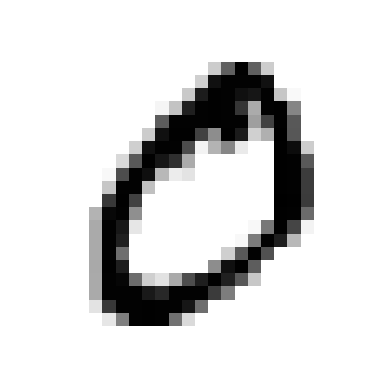

In [37]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [38]:
y[[1]]

1    0
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [42]:
X_train, X_teste, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [71]:
y.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

In [74]:
y_train[y_train == 5].value_counts()

class
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: count, dtype: int64

# Treinando um Classificador Binários

In [79]:
y_train = y_train.astype(int)

In [87]:
y_train_5 = (y_train == 0)
y_test_5 = (y_test == 0)

In [88]:
y_test_5.shape, y_train_5.shape

((10000,), (60000,))

In [89]:
y_train_5.value_counts()

class
False    54077
True      5923
Name: count, dtype: int64

In [90]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [91]:
 sgd_clf.predict(X.loc[[1]])

array([ True])

# Calculo de Desempenho

## Matriz de Confusão 

## Precisão e Revocação

## Trade Off Precisão/Revocação

## Curva ROC